In [1]:
import sys
import os
import pandas as pd


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from model.data import get_patient_records, load_pic

In [2]:
ignore_variables = {
    'PATIENTS': ['ROW_ID', 'EXPIRE_FLAG', 'DOD', 'SUBJECT_ID'],
    'ADMISSIONS': ['ROW_ID', 'HADM_ID', 'SUBJECT_ID'],
    'ICUSTAYS': ['ROW_ID', 'HADM_ID', 'ICUSTAY_ID', 'SUBJECT_ID'],
    'SURGERY_INFO': ['ROW_ID', 'HADM_ID', 'SUBJECT_ID', 'VISIT_ID', 'OPER_ID'],
    'DIAGNOSES_ICD': ['ROW_ID', 'HADM_ID', 'SUBJECT_ID'],
    'SURGERY_VITAL_SIGNS': ['ROW_ID', 'HADM_ID', 'SUBJECT_ID', 'VISIT_ID', 'OPER_ID', 'ITEM_NO'],
    'EMR_SYMPTOMS': ['ROW_ID', 'HADM_ID', 'SUBJECT_ID', 'EMR_ID', 'SYMPTOM_NAME_CN', 'SYMPTOM_ATTRIBUTE'],
    'LABEVENTS': ['ROW_ID', 'HADM_ID', 'SUBJECT_ID', 'VALUEUOM', 'CHARTTIME'],
    'MICROBIOLOGYEVENTS': ['ROW_ID', 'HADM_ID', 'SUBJECT_ID', 'AB_ITEMID', 'ORG_ITEMID', 'SPEC_ITEMID'],
    'OR_EXAM_REPORTS': ['ROW_ID', 'HADM_ID', 'SUBJECT_ID', 'REPORTTIME'],
    'CHARTEVENTS': ['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'VALUEUOM', 'STORETIME'],
    'INPUTEVENTS': ['ROW_ID', 'HADM_ID', 'ICUSTAY_ID', 'SUBJECT_ID'],
    'OUTPUTEVENTS': ['ROW_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'SUBJECT_ID'],
    'PRESCRIPTIONS': ['ROW_ID', 'HADM_ID', 'ICUSTAY_ID', 'SUBJECT_ID', 'DOSE_UNIT_RX', 'PROD_STRENGTH', 
                      'DRUG_NAME_GENERIC', 'DOSE_UNIT_RX', 'DRUG_FORM', 'DRUG_NAME'],
    'D_ITEMS': ['ROW_ID', 'ITEMID', 'UNITNAME', 'LINKSTO', 'LABEL_CN', 'CATEGORY'],
    'D_LABITEMS': ['ROW_ID', 'ITEMID', 'LABEL_CN'],
    'D_ICD_DIAGNOSES': ['ROW_ID']
}

In [3]:
es = load_pic()

Prune (0/1934) rows.
Prune (0/1996) rows.
Prune (0/2108) rows.
Prune (0/1838) rows.
Prune (0/3778) rows.
Prune (0/754213) rows.
Prune (0/75981) rows.
Prune (0/1724805) rows.
Prune (0/29547) rows.
Prune (0/39872) rows.
Prune (0/450989) rows.
Prune (253/2837) rows.
Prune (0/7849) rows.
Prune (0/171332) rows.
Prune (0/479) rows.
Prune (0/832) rows.
Prune (0/25379) rows.


In [4]:
subject_id = 3779

surgery_df = get_patient_records(es, "SURGERY_INFO", subject_id)
surgery_df

surgery_end = surgery_df["SURGERY_END_TIME"].iloc[0]
print(surgery_end)

2114-02-14 16:00:00


In [5]:
prescription_df = get_patient_records(es, "PRESCRIPTIONS", subject_id)
prescription_df

,STARTDATE,ENDDATE,DRUG_NAME,DRUG_NAME_EN,PROD_STRENGTH,DRUG_NAME_GENERIC,DOSE_VAL_RX,DOSE_UNIT_RX,DRUG_FORM
1120542,2114-02-06 09:28:27,2114-02-14 09:28:08,10％葡萄糖注射液,10% Glucose Injection,250ml(Bag),NaN,100.00,ml,injection
1120543,2114-02-06 09:28:27,2114-02-14 09:28:08,胰岛素注射液,Insulin Injection,10ml:400iu,NaN,2.50,iu,injection
1120544,2114-02-06 09:28:27,2114-02-14 09:28:08,10％氯化钾注射液,10% Potassium Chloride Injection,10ml(Bottle),NaN,3.00,ml,injection
1120545,2114-02-06 09:28:54,2114-02-14 09:28:05,(4:1)葡萄糖氯化钠注射液,(4:1)Glucose and Sodium Chloride Injection,50ml(Bag),NaN,50.00,ml,injection
1120546,2114-02-06 09:28:54,2114-02-14 09:28:05,注射用复合辅酶,Coenzyme Complex for Injection,100u+0.1mg,NaN,50.00,u,injection
...,...,...,...,...,...,...,...,...,...
1206925,2114-02-28 10:58:57,NaT,螺内酯片,Spironolactone Tablets,20mg*100,NaN,5.00,mg,tablet/capsule
1206926,2114-02-28 10:59:07,NaT,氢氯噻嗪片,Hydrochlorothiazide Tablets,25mg*100,NaN,6.25,mg,tablet/capsule
1206927,2114-02-28 10:59:18,NaT,布洛芬混悬液,Ibuprofen Suspension,30ml:0.6g,Motrin,5.00,ml,water aqua
1206928,2114-02-28 10:59:51,NaT,葡萄糖酸锌颗粒,Zinc Gluconate Granules,5g:35mg*16,NaN,35.00,mg,powder


In [6]:
prescription_df = prescription_df[prescription_df["STARTDATE"] < surgery_end]
prescription_df

,STARTDATE,ENDDATE,DRUG_NAME,DRUG_NAME_EN,PROD_STRENGTH,DRUG_NAME_GENERIC,DOSE_VAL_RX,DOSE_UNIT_RX,DRUG_FORM
1120542,2114-02-06 09:28:27,2114-02-14 09:28:08,10％葡萄糖注射液,10% Glucose Injection,250ml(Bag),NaN,100.0,ml,injection
1120543,2114-02-06 09:28:27,2114-02-14 09:28:08,胰岛素注射液,Insulin Injection,10ml:400iu,NaN,2.5,iu,injection
1120544,2114-02-06 09:28:27,2114-02-14 09:28:08,10％氯化钾注射液,10% Potassium Chloride Injection,10ml(Bottle),NaN,3.0,ml,injection
1120545,2114-02-06 09:28:54,2114-02-14 09:28:05,(4:1)葡萄糖氯化钠注射液,(4:1)Glucose and Sodium Chloride Injection,50ml(Bag),NaN,50.0,ml,injection
1120546,2114-02-06 09:28:54,2114-02-14 09:28:05,注射用复合辅酶,Coenzyme Complex for Injection,100u+0.1mg,NaN,50.0,u,injection
1120547,2114-02-06 09:28:54,2114-02-14 09:28:05,0.9％氯化钠注射液,0.9% Sodium Chloride Injection,10ml(Bottle),NaN,5.0,ml,injection
1120548,2114-02-06 09:29:12,2114-02-08 09:06:23,(4:1)葡萄糖氯化钠注射液,(4:1)Glucose and Sodium Chloride Injection,50ml(Bag),NaN,50.0,ml,injection
1120549,2114-02-06 09:29:12,2114-02-08 09:06:23,注射用磷酸肌酸钠,Creatine phosphate sodium for injection,0.5g,NaN,0.5,g,injection
1120550,2114-02-06 09:29:12,2114-02-08 09:06:23,灭菌注射用水,Sterile Water Injection,5ml*50,NaN,5.0,ml,injection
1120551,2114-02-06 09:29:32,2114-02-14 12:17:07,0.9％氯化钠注射液,0.9% Sodium Chloride Injection,10ml(Bottle),NaN,2.0,ml,injection


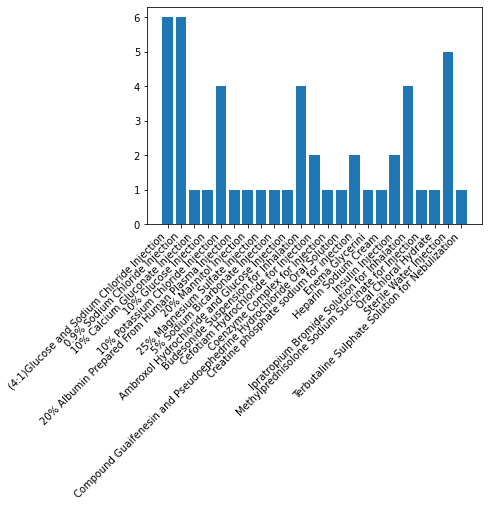

In [7]:
import matplotlib.pyplot as plt
import numpy as np

values, counts = np.unique(prescription_df["DRUG_NAME_EN"], return_counts=True)

x = np.arange(len(values))
y = counts

plt.bar(x, y)
plt.xticks(ticks=x, labels=values, rotation=45, ha='right')
plt.show()

In [8]:
import sys
import featuretools as ft

med_names, med_counts = np.unique(es["PRESCRIPTIONS"].df["DRUG_NAME_EN"], return_counts=True)
sym_names, sym_counts = np.unique(es["EMR_SYMPTOMS"].df["SYMPTOM_NAME"], return_counts=True)

def meds_exists(column):
    return [v in column.values for v in med_names]

def syms_exists(column):
    return [v in column.values for v in sym_names]

target_entity = 'SURGERY_INFO'
label_times = es['SURGERY_INFO'].df[['UNI_OPER_ID', 'SURGERY_END_TIME']]
label_times.columns = ['instance_id', 'time']

Meds = ft.primitives.make_agg_primitive(function=meds_exists,
                                        input_types=[ft.variable_types.Discrete],
                                        return_type=ft.variable_types.Boolean,
                                        number_output_features=len(med_names))

Syms = ft.primitives.make_agg_primitive(function=syms_exists,
                                        input_types=[ft.variable_types.Discrete],
                                        return_type=ft.variable_types.Boolean,
                                        number_output_features=len(sym_names))
    
feature_matrix, features_list = ft.dfs(entityset=es,
                                       target_entity=target_entity,
                                       agg_primitives=[Meds, Syms],
                                       trans_primitives=[],
                                       allowed_paths=[['SURGERY_INFO', 'ADMISSIONS'],  
                                                      ['SURGERY_INFO', 'ADMISSIONS', 'PRESCRIPTIONS'],
                                                      ['SURGERY_INFO', 'ADMISSIONS', 'EMR_SYMPTOMS']],
                                       ignore_variables=ignore_variables,
                                       cutoff_time=label_times,
                                       max_depth=2,
                                       verbose=True,
                                       primitive_options = {
                                           Meds: {'include_entities': ['PRESCRIPTIONS']},
                                           Syms: {'include_entities': ['EMR_SYMPTOMS']}
                                       }
                                      )

feature_matrix = feature_matrix.fillna(0)

Built 612 features
Elapsed: 15:19 | Progress: 100%|██████████


In [9]:
print(features_list[100])

descriptions = ["Patient has taken " + s for s in values]

primitive_templates = {'exists': descriptions} 

ft.describe_feature(features_list[100], primitive_templates=primitive_templates)

<Feature: ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[73]>


'The 74th output from applying SYMS_EXISTS to the "SYMPTOM_NAME" of all instances of "EMR_SYMPTOMS" for each "HADM_ID" in "ADMISSIONS" for the instance of "ADMISSIONS" associated with this instance of "SURGERY_INFO".'

In [10]:
drug_feature_matrix = feature_matrix.copy()

for column in drug_feature_matrix:
    if not "ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)" in column:
        drug_feature_matrix.drop(column, inplace=True, axis="columns")
        
drug_feature_matrix

,ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[0],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[1],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[2],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[3],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[4],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[5],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[6],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[7],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[8],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[9],...,ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[282],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[283],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[284],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[285],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[286],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[287],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[288],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[289],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[290],ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[291]
UNI_OPER_ID,,,,,,,,,,,,,,,,,,,,,
604873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
429001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812617,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
788113,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
prescription_counts = drug_feature_matrix.sum(axis="rows")
prescription_counts

ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[0]        4.0
ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[1]        1.0
ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[2]      871.0
ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[3]      489.0
ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[4]        2.0
                                                           ...  
ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[287]      0.0
ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[288]      1.0
ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[289]     16.0
ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[290]     11.0
ADMISSIONS.MEDS_EXISTS(PRESCRIPTIONS.DRUG_NAME_EN)[291]      0.0
Length: 292, dtype: float64

In [12]:
med_name_order = []
med_counts = []
for med in prescription_counts.index:
    # extract the number in the brackets of the feature name, and get the corresponding med name
    med_name_order.append(med_names[int(med[med.find("[")+1:med.find("]")])])  
    med_counts.append(prescription_counts[med])
    
    
sort_order = np.argsort(med_counts)[::-1]

med_name_order = np.array(med_name_order)[sort_order]
med_counts = np.array(med_counts)[sort_order]

total_drugs = drug_feature_matrix.shape[0]

In [13]:
def get_row(key, label, df):
    return df[df[label]==key].iloc[0]

rows = [get_row(name, "DRUG_NAME_EN", es["PRESCRIPTIONS"].df) for name in med_name_order]
meds_df = pd.concat(rows, axis=1).T
meds_df["FREQUENCY"] = med_counts / total_drugs

meds_df

partial_meds_df = meds_df[["DRUG_NAME_EN", "DRUG_NAME", "FREQUENCY"]]
partial_meds_df = partial_meds_df[partial_meds_df["FREQUENCY"] > 0.05]
partial_meds_df
partial_meds_df.to_csv("frequent_prescriptions.csv")

Most common medications: 
        (4:1)Glucose and Sodium Chloride Injection --- 47%
                           Sterile Water Injection --- 47%
                                   Enema Glycerini --- 46%
                  10% Potassium Chloride Injection --- 42%
                           Cefradine for Injection --- 40%
                   5% Sodium Bicarbonate Injection --- 37%
  20% Albumin Prepared From Human Plasma Injection --- 37%
                   25% Magnesium Sulfate Injection --- 37%
                   10% Calcium Gluconate Injection --- 37%
 Methylprednisolone Sodium Succinate for Injection --- 37%
                            20% Mannitol Injection --- 36%
           Creatine phosphate sodium for injection --- 36%
                    0.9% Sodium Chloride Injection --- 26%
                  Chloral hydrate powder for enema --- 17%
                            Spironolactone Tablets --- 12%
                       Hydrochlorothiazide Tablets --- 12%
                              

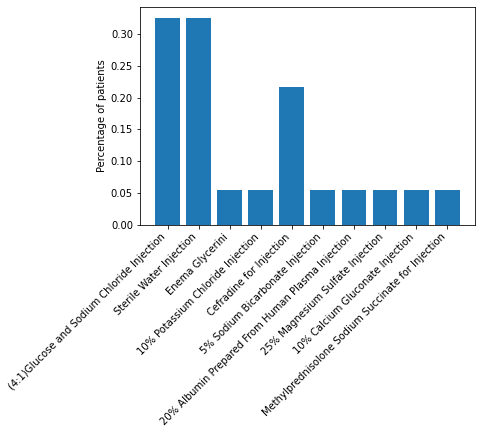

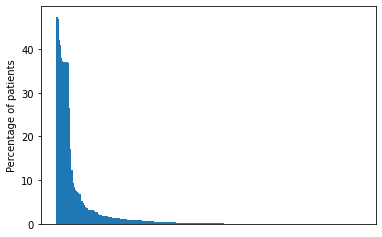

In [15]:
N = 10

print("Most common medications: ")
for name, count in zip(med_name_order[:20], med_counts[:20]):
    print("%50s --- %2i%%" % (name, count*100//total_drugs))

x = np.arange(N)
y = counts[:N] / total_drugs * 100

plt.bar(x, y)
plt.xticks(ticks=x, labels=med_name_order[:N], rotation=45, ha='right')
plt.ylabel("Percentage of patients")
plt.show()

x = np.arange(len(med_name_order))
y = med_counts / total_drugs * 100

plt.bar(x, y, width=1)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel("Percentage of patients")
plt.show()

# CONSIDER DURATIONS

In [16]:
symptom_name_feature_matrix = feature_matrix.copy()

for column in feature_matrix:
    if not "ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)" in column:
        symptom_name_feature_matrix.drop(column, inplace=True, axis="columns")

symptom_counts = symptom_name_feature_matrix.sum(axis="rows")
symptom_counts

ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[0]       22.0
ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[1]       82.0
ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[2]       79.0
ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[3]        5.0
ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[4]        9.0
                                                          ...  
ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[288]     42.0
ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[289]      5.0
ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[290]      1.0
ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[291]      4.0
ADMISSIONS.SYMS_EXISTS(EMR_SYMPTOMS.SYMPTOM_NAME)[292]    104.0
Length: 293, dtype: float64

In [17]:
sym_name_order = []
sym_counts = []
for med in symptom_counts.index:
    # extract the number in the brackets of the feature name, and get the corresponding med name
    sym_name_order.append(sym_names[int(med[med.find("[")+1:med.find("]")])])  
    sym_counts.append(symptom_counts[med])
    
    
sort_order = np.argsort(sym_counts)[::-1]

sym_name_order = np.array(sym_name_order)[sort_order]
sym_counts = np.array(sym_counts)[sort_order]

total_syms = symptom_name_feature_matrix.shape[0]

In [18]:
def get_row(key, label, df):
    return df[df[label]==key].iloc[0]

rows = [get_row(name, "SYMPTOM_NAME", es["EMR_SYMPTOMS"].df) for name in sym_name_order]
sym_df = pd.concat(rows, axis=1).T
sym_df["FREQUENCY"] = sym_counts / total_syms

sym_df

partial_sym_df = sym_df[["SYMPTOM_NAME_CN", "SYMPTOM_NAME", "FREQUENCY"]]
partial_sym_df = partial_sym_df[partial_sym_df["FREQUENCY"] > 0.05]
partial_sym_df
partial_sym_df.to_csv("frequent_symptoms.csv")

Most common symptoms: 
                                      heart murmur ---  8%
                                    abdominal soft ---  8%
                              regular heart rhythm ---  8%
                                       good spirit ---  8%
                               dry and moist rales ---  7%
             swelling of the spleen under the ribs ---  7%
                      tricuspid regurgitation (TR) ---  7%
                                             cough ---  7%
                                        arrhythmia ---  7%
                                    cardiac arrest ---  7%
    difficulty weaning from mechanical ventilation ---  7%
       difficulty in cardiopulmonary resuscitation ---  7%
                                   voice disorders ---  7%
                                   chest tightness ---  7%
                        atrial septal defect (ASD) ---  7%
                           anhelation and cyanosis ---  7%
                             vasc

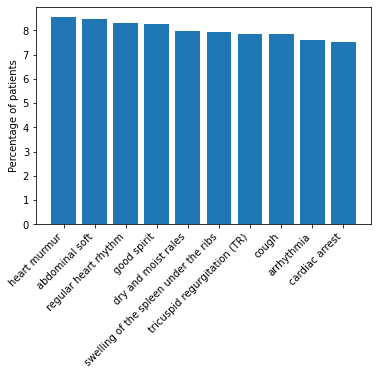

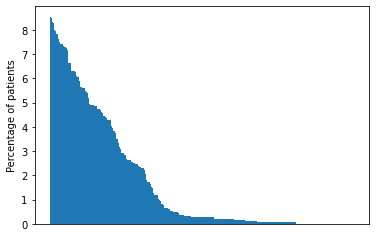

In [21]:
N = 10

print("Most common symptoms: ")
for name, count in zip(sym_name_order[:20], sym_counts[:20]):
    print("%50s --- %2i%%" % (name, count*100//total_syms))

x = np.arange(N)
y = sym_counts[:N] / total_syms * 100

plt.bar(x, y)
plt.xticks(ticks=x, labels=sym_name_order[:N], rotation=45, ha='right')
plt.ylabel("Percentage of patients")
plt.show()

x = np.arange(len(sym_name_order))
y = sym_counts / total_syms * 100

plt.bar(x, y, width=1)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel("Percentage of patients")
plt.show()

In [61]:
# select frequent lab test items, 18 among 821
lab_count = es['LABEVENTS'].df['ITEMID'].value_counts()
lab_test_items = lab_count[lab_count >= 5000].index
es['LABEVENTS']['ITEMID'].interesting_values = lab_test_items

chart_event_items = es['CHARTEVENTS'].df['ITEMID'].unique()
es['CHARTEVENTS']['ITEMID'].interesting_values = chart_event_items

# add last time indexes
es.add_last_time_indexes()

In [62]:
import sys
import featuretools as ft

target_entity = 'SURGERY_INFO'
label_times = es['SURGERY_INFO'].df[['UNI_OPER_ID', 'SURGERY_END_TIME']]
label_times.columns = ['instance_id', 'time']

    
lab_events_matrix, lab_events_list = ft.dfs(entityset=es,
                                       target_entity=target_entity,
                                       #agg_primitives=['mean', 'std', 'trend'],
                                       #trans_primitives=[],
                                       where_primitives=['mean', 'std', 'trend'],
                                       allowed_paths=[['SURGERY_INFO', 'ADMISSIONS'],  
                                                      ['SURGERY_INFO', 'ADMISSIONS', 'LABEVENTS'],
                                                      ['SURGERY_INFO', 'ADMISSIONS', 'LABEVENTS', 'D_LABITEMS']],
                                       ignore_variables=ignore_variables,
                                       cutoff_time=label_times,
                                       max_depth=3,
                                       verbose=True,
                                      )

#lab_events_matrix = lab_events_matrix.fillna(0)

Built 233 features
Elapsed: 00:00 | Progress:   0%|          

/home/zyteka/pic-venv/lib/python3.8/site-packages/featuretools/synthesis/dfs.py:317: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  where_primitives: ['trend']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible variable types for the primitive were found in the data.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Elapsed: 47:50 | Progress: 100%|██████████


In [63]:
for i in lab_events_list:
    print(i)

<Feature: SURGERY_NAME>
<Feature: SURGERY_POSITION>
<Feature: Height>
<Feature: Weight>
<Feature: Preoperative oxygen saturation (%)>
<Feature: Oxygen saturation (%)>
<Feature: Surgical time (minutes)>
<Feature: CPB time (minutes)>
<Feature: Aortic cross-clamping time (times)>
<Feature: complication>
<Feature: lung complication>
<Feature: cardiac complication>
<Feature: arrhythmia complication>
<Feature: infectious complication>
<Feature: other complication>
<Feature: Age>
<Feature: DAY(ANES_END_TIME)>
<Feature: DAY(ANES_START_TIME)>
<Feature: DAY(SURGERY_BEGIN_TIME)>
<Feature: DAY(SURGERY_END_TIME)>
<Feature: MONTH(ANES_END_TIME)>
<Feature: MONTH(ANES_START_TIME)>
<Feature: MONTH(SURGERY_BEGIN_TIME)>
<Feature: MONTH(SURGERY_END_TIME)>
<Feature: NUM_CHARACTERS(ANES_METHOD)>
<Feature: NUM_WORDS(ANES_METHOD)>
<Feature: WEEKDAY(ANES_END_TIME)>
<Feature: WEEKDAY(ANES_START_TIME)>
<Feature: WEEKDAY(SURGERY_BEGIN_TIME)>
<Feature: WEEKDAY(SURGERY_END_TIME)>
<Feature: YEAR(ANES_END_TIME)>
<Fea

In [64]:
lab_events_matrix

,SURGERY_NAME,SURGERY_POSITION,Height,Weight,Preoperative oxygen saturation (%),Oxygen saturation (%),Surgical time (minutes),CPB time (minutes),Aortic cross-clamping time (times),complication,...,ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5235),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5239),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5223),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5215),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5252),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5110),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5178),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5174),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5218),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5226)
UNI_OPER_ID,,,,,,,,,,,,,,,,,,,,,
604873,VSD repair+PDA closure,supine position,58.0,6.2,96.0,95.0,120,64.0,33.0,0,...,2.711088,18.962683,2.197536,0.699976,0.340343,NaN,0.353553,0.077782,4.272002,0.377492
614281,PAPVC repair,supine position,87.0,10.5,98.0,97.0,132,69.0,40.0,0,...,3.875564,101.065573,2.639918,0.490943,0.457347,1.421285,0.070711,0.007071,3.915780,0.191485
609417,ASD repair,horizontal position,99.0,15.5,98.0,99.0,220,147.0,120.0,0,...,6.981189,108.746494,4.160529,0.208255,0.212132,NaN,NaN,NaN,4.086563,0.638749
399113,VSD repair,supine position,57.0,4.7,98.0,NaN,124,71.0,44.0,0,...,4.793398,49.304327,0.330404,0.684324,0.556028,NaN,NaN,NaN,2.828427,0.330404
429001,ASD repair,supine position,80.0,9.2,100.0,99.0,102,49.0,29.0,0,...,2.330236,57.604253,0.994987,0.586138,0.408248,NaN,NaN,NaN,3.403430,0.129099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812617,VSD closure,horizontal position,121.0,31.0,98.0,97.0,48,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,1.350574,NaN,NaN,NaN,NaN
788113,VSD repair,left lateral position,76.0,11.5,98.0,99.0,203,96.0,56.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894993,ultrasonic cardiogram,supine position,80.0,10.0,98.0,98.0,101,40.0,24.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
lab_event_matrix = lab_events_matrix.copy()
lab_event_matrix_backup = lab_events_matrix.copy()

for column in lab_event_matrix:
    if not "LABEVENTS.VALUENUM WHERE ITEMID" in column:
        lab_event_matrix.drop(column, inplace=True, axis="columns")

lab_event_matrix

,ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID = 5002),ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID = 5097),ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID = 5129),ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID = 5120),ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID = 5046),ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID = 5225),ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID = 5224),ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID = 5227),ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID = 5127),ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID = 5626),...,ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5235),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5239),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5223),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5215),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5252),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5110),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5178),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5174),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5218),ADMISSIONS.STD(LABEVENTS.VALUENUM WHERE ITEMID = 5226)
UNI_OPER_ID,,,,,,,,,,,,,,,,,,,,,
604873,0.700000,33.700000,324.000000,10.400000,13.200000,25.075000,24.625000,2.725000,0.340000,3.00,...,2.711088,18.962683,2.197536,0.699976,0.340343,NaN,0.353553,0.077782,4.272002,0.377492
614281,5.900000,38.450000,347.500000,6.750000,24.200000,26.050000,21.600000,1.275000,0.235000,6.00,...,3.875564,101.065573,2.639918,0.490943,0.457347,1.421285,0.070711,0.007071,3.915780,0.191485
609417,2.300000,39.300000,271.000000,9.300000,27.400000,28.340000,23.540000,1.220000,0.250000,6.00,...,6.981189,108.746494,4.160529,0.208255,0.212132,NaN,NaN,NaN,4.086563,0.638749
399113,6.700000,32.900000,364.000000,9.100000,NaN,28.525000,24.800000,2.325000,0.330000,NaN,...,4.793398,49.304327,0.330404,0.684324,0.556028,NaN,NaN,NaN,2.828427,0.330404
429001,2.300000,39.400000,242.000000,10.500000,18.300000,30.675000,21.300000,1.800000,0.250000,NaN,...,2.330236,57.604253,0.994987,0.586138,0.408248,NaN,NaN,NaN,3.403430,0.129099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812617,2.600000,40.300000,383.500000,9.800000,32.000000,39.400000,22.600000,1.500000,0.375000,NaN,...,NaN,NaN,NaN,NaN,NaN,1.350574,NaN,NaN,NaN,NaN
788113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
print("NOTE: these visualizations assume a lab test type is always measured with the same unit (not yet confirmed)")

counts = lab_event_matrix.count()
rows = []
for column in lab_event_matrix:
    if "ADMISSIONS.MEAN(LABEVENTS.VALUENUM WHERE ITEMID" in column:
        itemid = column[column.find("=")+2:column.find(")")]
        lab_test_name = es["D_LABITEMS"].df[es["D_LABITEMS"].df["ITEMID"]==itemid]["LABEL"].iloc[0]
        lab_test_fluid = es["D_LABITEMS"].df[es["D_LABITEMS"].df["ITEMID"]==itemid]["FLUID"].iloc[0]
        units = es["LABEVENTS"].df[es["LABEVENTS"].df["ITEMID"]==itemid]["VALUEUOM"].iloc[0]
        
        #plt.hist(lab_event_matrix[column])
        #plt.title(lab_test_name + ", " + lab_test_fluid)
        #plt.xlabel(units)
        #plt.savefig(os.path.join("Figures", lab_test_name + "_" + lab_test_fluid))
        #plt.show()
        
        row = es["D_LABITEMS"].df[es["D_LABITEMS"].df["ITEMID"]==itemid]
        row = row[["ITEMID", "LABEL_CN", "LABEL", "FLUID"]]
        row["FREQUENCY"] = counts[column] / (lab_event_matrix.shape[0])
        rows.append(row)
lab_event_df = pd.concat(rows)

NOTE: these visualizations assume a lab test type is always measured with the same unit (not yet confirmed)


In [73]:
lab_event_df.sort_values(by="FREQUENCY", axis="index", inplace=True, ascending=False)
lab_event_df = lab_event_df[lab_event_df["FREQUENCY"] > 0.05]
lab_event_df
lab_event_df.to_csv("frequent_lab_events.csv")

In [28]:
es["CHARTEVENTS"].df

import sys
import featuretools as ft

target_entity = 'SURGERY_INFO'
label_times = es['SURGERY_INFO'].df[['UNI_OPER_ID', 'SURGERY_END_TIME']]
label_times.columns = ['instance_id', 'time']

    
chartevents_feature_matrix, chartevents_features_list = ft.dfs(entityset=es,
                                       target_entity=target_entity,
                                       #agg_primitives=['mean', 'std', 'trend'],
                                       #trans_primitives=[],
                                       where_primitives=['mean', 'std', 'trend', 'mode'],
                                       allowed_paths=[['SURGERY_INFO', 'ADMISSIONS'],  
                                                      ['SURGERY_INFO', 'ADMISSIONS', 'CHARTEVENTS'],
                                                      ['SURGERY_INFO', 'ADMISSIONS', 'CHARTEVENTS', 'D_LABITEMS']],
                                       ignore_variables=ignore_variables,
                                       cutoff_time=label_times,
                                       max_depth=3,
                                       verbose=True,
                                      )

chartevents_feature_matrix = chartevents_feature_matrix.fillna(0)

Built 231 features
Elapsed: 00:00 | Progress:   0%|          

/home/zyteka/pic-venv/lib/python3.8/site-packages/featuretools/synthesis/dfs.py:317: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  where_primitives: ['trend']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible variable types for the primitive were found in the data.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Elapsed: 00:58 | Progress:   5%|▌         


KeyboardInterrupt: 

In [ ]:
chart_event_matrix = chartevents_feature_matrix.copy()
chartevents_feature_matrix_backup = chartevents_feature_matrix.copy()

for column in chart_event_matrix:
    if not "CHARTEVENTS.VALUENUM WHERE ITEMID" in column:
        chart_event_matrix.drop(column, inplace=True, axis="columns")

chart_event_matrix

In [ ]:
print("NOTE: these visualizations assume a lab test type is always measured with the same unit (not yet confirmed)")
print(es["D_ITEMS"])

for column in chartevents_feature_matrix:
    if "ADMISSIONS.MEAN(CHARTEVENTS.VALUENUM WHERE ITEMID" in column:
        itemid = column[column.find("=")+2:column.find(")")]
        chart_test_name = es["D_ITEMS"].df[es["D_ITEMS"].df["ITEMID"]==itemid]["LABEL"].iloc[0]
        units = es["D_ITEMS"].df[es["D_ITEMS"].df["ITEMID"]==itemid]["UNITNAME"].iloc[0]
        
        plt.hist(chartevents_feature_matrix[column])
        plt.title(chart_test_name)
        plt.xlabel(units)
        plt.savefig(os.path.join("Figures", chart_test_name))
        plt.show()